In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.font_manager as fontm
%matplotlib inline

In [2]:
import scipy.stats
import random

In [104]:
df= pd.read_csv('news205.csv')

In [105]:
ls = ['info_source','news_source','identity','single_story','tone','home','frame','cons']
info = list(df.columns)[3:10]
news = list(df.columns)[10:14]
identity = list(df.columns)[14:22]
single =list(df.columns)[22:24]
tone =list(df.columns)[24:27]
home = list(df.columns)[27:29]
frame1 = list(df.columns)[29:31]
frame2 = list(df.columns)[31:37]
cons=list(df.columns)[37:41]

In [106]:
df['cons_01']=0
for i in cons:
    df['cons_01']= df[i]+df['cons_01']
cons_news_df = df[df['cons_01'].isin([1,2,3,4])]
noncons_news_df = df[df['cons_01'].isin([0])]
print(cons_news_df.shape,noncons_news_df.shape)

(111, 43) (94, 43)


In [108]:
d = {0:0,1:1,2:1,3:1,4:1}
df['ncn']=df['cons_01'].map(d)

In [107]:
for i in cons:
    print(i+str(sum(df[i])))

建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）101.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）9.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）29.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）15.0


In [131]:
#建设性新闻的词云，与非建设性新闻的差异
origin1 = pd.read_csv('../sample1/shut_sample1.csv')
origin2 = pd.read_csv('../sample2/shut_sample2.csv',lineterminator='\n')
origin3 = pd.read_csv('../sample3/shut_sample3.csv')

origin=pd.concat([origin1,origin2,origin3])

origin=origin[['index','date','comment_num']]


In [133]:
cons_news_df = pd.merge(cons_news_df,origin,on=['index','date'],how='inner')
noncons_news_df = pd.merge(noncons_news_df,origin,on=['index','date'],how='inner')

In [150]:
#正态性检验
a = np.array(cons_news_df['comment_num'].values)
b = np.array(noncons_news_df['comment_num'].values)

print(scipy.stats.kstest(a,'norm'))
print(scipy.stats.kstest(b,'norm'))

KstestResult(statistic=0.5, pvalue=5.917791553493453e-26)
KstestResult(statistic=0.5, pvalue=1.736958121893621e-22)


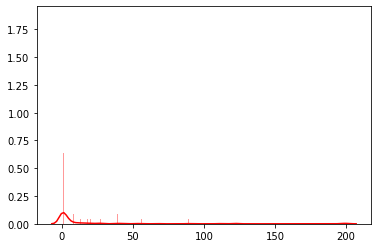

In [153]:
sns.set_palette("hls")
sns.distplot(a,color="r",bins=1000,kde=True)
plt.show()


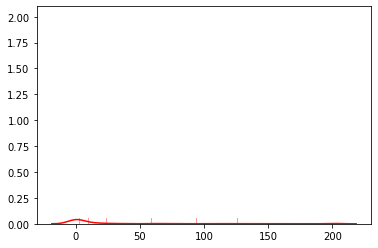

In [154]:
sns.set_palette("hls")
sns.distplot(b,color="r",bins=1000,kde=True)
plt.show()

In [157]:
stats.levene(a,b)
#不是正态分布，但方差齐性检验是齐方差 p>0.05

LeveneResult(statistic=3.0021141786494083, pvalue=0.08467467101265148)

In [160]:
scipy.stats.ttest_ind(a,b, equal_var=True, nan_policy='propagate')
#可以看到评论对于建设性和非建设性新闻的没有差异

Ttest_indResult(statistic=-1.7072463733568841, pvalue=0.08930521476797934)

In [161]:
cons_news_df.shape[0]+noncons_news_df.shape[0]==205

True

In [109]:
frame1_news = pd.DataFrame(columns=frame1)
for i in news:
    data = df[df[i]==1]
    tmp = []
    for j in frame1:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    frame1_news = frame1_news.reindex(index=list(frame1_news.index)+[i])
    frame1_news.loc[i] = tmp
        

In [110]:
frame1_news

,框架类型-情节框架（封城中的事件、故事和细节）,框架类型-议题框架
新闻源-商业媒体（界面/财新）,23.0,27.0
新闻源-大型央媒（人民日报/新华社/央视/光明日报）,4.0,11.0
新闻源-其他报纸、电视和广播电台,17.0,20.0
新闻源-自媒体等其他网络媒体,29.0,74.0


In [111]:
f_obs = np.array([frame1_news.iloc[0][:].values,frame1_news.iloc[1][:].values])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) #not significant

(1.0690789473684204, 0.30115358246198887, 1)


# info-cons

In [112]:
info_cons = pd.DataFrame(columns=info)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in info:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    info_cons = info_cons.reindex(index=list(info_cons.index)+[i])
    info_cons.loc[i] = tmp

In [113]:
info_cons

,消息源-政府部门及官员,消息源-专家学者,消息源-医护工作者,消息源-志愿者,消息源-企业,消息源-微博及网友,消息源-媒体
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,21.0,11.0,7.0,13.0,28.0,0.0,21.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,2.0,2.0,2.0,0.0,0.0,0.0,3.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,3.0,0.0,2.0,9.0,2.0,0.0,13.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,1.0,6.0,3.0,0.0,3.0,0.0,2.0


In [114]:
info_cons = pd.DataFrame(columns=info)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in info:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    info_cons = info_cons.reindex(index=list(info_cons.index)+[i])
    info_cons.loc[i] = tmp

In [225]:
info_cons

,消息源-政府部门及官员,消息源-专家学者,消息源-医护工作者,消息源-志愿者,消息源-企业,消息源-微博及网友,消息源-媒体
0,7.0,9.0,2.0,0.0,28.0,1.0,40.0
1,22.0,14.0,7.0,13.0,30.0,0.0,12.0


In [115]:
a = [7,11,28,41]
b = [22,34,30,12]
#消息源-政府部门及官员,消息源-专家学者and医护工作者and,消息源-企业,消息源-微博及网友and媒体

f_obs = np.array([a,b])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) #significant

(34.92047102395776, 1.266303847584969e-07, 3)


# 新闻源

In [116]:
news_cons = pd.DataFrame(columns=news)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in news:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    news_cons = news_cons.reindex(index=list(news_cons.index)+[i])
    news_cons.loc[i] = tmp

In [117]:
news_cons

,新闻源-商业媒体（界面/财新）,新闻源-大型央媒（人民日报/新华社/央视/光明日报）,新闻源-其他报纸、电视和广播电台,新闻源-自媒体等其他网络媒体
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,23.0,10.0,20.0,48.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,1.0,1.0,2.0,5.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,8.0,2.0,10.0,9.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,3.0,0.0,2.0,10.0


In [118]:
news_cons = pd.DataFrame(columns=news)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in news:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    news_cons = news_cons.reindex(index=list(news_cons.index)+[i])
    news_cons.loc[i] = tmp

In [119]:
news_cons

,新闻源-商业媒体（界面/财新）,新闻源-大型央媒（人民日报/新华社/央视/光明日报）,新闻源-其他报纸、电视和广播电台,新闻源-自媒体等其他网络媒体
0,26.0,4.0,14.0,50.0
1,24.0,11.0,23.0,53.0


In [121]:
a = [26,18,50]
b = [24,34,53]
#央媒and其他报纸、电视和广播电台

f_obs = np.array([a,b])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) # not significant

(3.706186387553875, 0.15675155272493793, 2)


# 报道对象

In [122]:
identity_cons = pd.DataFrame(columns=identity)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in identity:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    identity_cons = identity_cons.reindex(index=list(identity_cons.index)+[i])
    identity_cons.loc[i] = tmp
    
identity_cons

,报道对象-疫情发展与防控情况,报道对象-患者及其家属,报道对象-志愿者,报道对象-政府部门和官员,报道对象-医护工作者,报道对象-除上述角色外的普通群众,报道对象-公司企业,报道对象-媒体
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,26.0,0.0,17.0,12.0,6.0,10.0,30.0,0.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,2.0,0.0,12.0,2.0,4.0,5.0,4.0,0.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,10.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0


In [123]:
identity_cons = pd.DataFrame(columns=identity)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in identity:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    identity_cons = identity_cons.reindex(index=list(identity_cons.index)+[i])
    identity_cons.loc[i] = tmp
    
identity_cons

,报道对象-疫情发展与防控情况,报道对象-患者及其家属,报道对象-志愿者,报道对象-政府部门和官员,报道对象-医护工作者,报道对象-除上述角色外的普通群众,报道对象-公司企业,报道对象-媒体
0,35.0,2.0,0.0,4.0,2.0,8.0,43.0,0.0
1,30.0,0.0,17.0,14.0,7.0,11.0,32.0,0.0


In [125]:
a = [35,8,8,43]
b = [30,38,11,32]
#特殊群众：报道对象-患者及其家属	报道对象-志愿者	报道对象-政府部门和官员	报道对象-医护工作者

f_obs = np.array([a,b])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) # significant

(20.769926075539786, 0.00011751665435738802, 3)


# Tone

In [126]:
tone_cons = pd.DataFrame(columns=tone)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in tone:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    tone_cons = tone_cons.reindex(index=list(tone_cons.index)+[i])
    tone_cons.loc[i] = tmp
    
tone_cons

,报道基调-正面,报道基调-中立,报道基调-负面
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,44.0,57.0,0.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,2.0,6.0,1.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,23.0,5.0,1.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,1.0,14.0,0.0


In [127]:
tone_cons = pd.DataFrame(columns=tone)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in tone:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    tone_cons = tone_cons.reindex(index=list(tone_cons.index)+[i])
    tone_cons.loc[i] = tmp
    
tone_cons

,报道基调-正面,报道基调-中立,报道基调-负面
0,2.0,87.0,5.0
1,46.0,63.0,2.0


# home

In [128]:
#后发现有比较的文章，于是认为非互斥
home_cons = pd.DataFrame(columns=home)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in home:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    home_cons = home_cons.reindex(index=list(home_cons.index)+[i])
    home_cons.loc[i] = tmp
    
home_cons

,封城地点-国外,封城地点-国内
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,2.0,99.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,0.0,9.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,0.0,29.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,1.0,14.0


# single

In [129]:
cons_single = pd.DataFrame(columns=cons)
for i in single:
    data = df[df[i]==1]
    tmp = []
    for j in cons:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    cons_single = cons_single.reindex(index=list(cons_single.index)+[i])
    cons_single.loc[i] = tmp
cons_single

,建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）
叙事类型-个人叙事,37.0,2.0,22.0,3.0
叙事类型-非个人叙事,64.0,7.0,7.0,12.0


In [158]:

for i in range(df.shape[0]):
    data = df.iloc[i,:]   
    if not(sum(data[27:29])==1.0):
        print(data[:4])


index                               1680
date                               03-09
title          早盘：标普500指数暴跌7% 触发熔断机制暂停交易
消息源-政府部门及官员                            0
Name: 30, dtype: object
index                       151
date                      02-23
title          现在，全世界最担忧的是这个国家！
消息源-政府部门及官员                   0
Name: 109, dtype: object
index                  1760
date                  03-04
title          新冠疫情下油价走势的遐思
消息源-政府部门及官员               0
Name: 162, dtype: object


In [162]:
df[df['报道基调-负面']==1]

,index,date,title,消息源-政府部门及官员,消息源-专家学者,消息源-医护工作者,消息源-志愿者,消息源-企业,消息源-微博及网友,消息源-媒体,...,框架类型-处理建议（对市民的建议和提供帮助的渠道介绍）,框架类型-道德评估（对社会各界反应的评论等）,框架类型-历史背景（指近期或远期的相关事件和历史）,建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,from,cons_01,ncn
48,1500,02-02,"作为在物资方面容易""灯下黑""的城市 孝感开始自救",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1.0,1
80,2005,02-25,防疫人员自杀、首尔至青岛机票暴涨，韩国疫情引多重疑问,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0
88,911,01-31,如此谈论中国疫情 美国商务部长的冷血很美国,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0
97,29,02-11,解放军战机越过“中线”台军战机拦截 双方喊话曝光,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0
101,819,01-23,新京报怒骂：炫耀带“病”偷溜国外 也是种“病”,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1.0,1
120,470,01-26,美媒炒作武汉“封城”是“侵犯人权” 结果翻车了,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0
151,164,02-17,不择手段诋毁大陆抗疫 台湾知名节目令人“智息”,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0


In [147]:
cons_single = pd.DataFrame(columns=single)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in single:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)

    cons_single = cons_single.reindex(index=list(cons_single.index)+[i])
    cons_single.loc[i] = tmp
cons_single

,叙事类型-个人叙事,叙事类型-非个人叙事
0,11.0,83.0
1,39.0,72.0


In [148]:
f_obs = np.array([cons_single.iloc[0,:].values,cons_single.iloc[1,:].values])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) # significant

(13.911069657509255, 0.00019166632205087805, 1)


# frame1

In [163]:
frame1_cons = pd.DataFrame(columns=frame1)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in frame1:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    frame1_cons = frame1_cons.reindex(index=list(frame1_cons.index)+[i])
    frame1_cons.loc[i] = tmp

In [164]:
frame1_cons

,框架类型-情节框架（封城中的事件、故事和细节）,框架类型-议题框架
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,48.0,53.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,1.0,8.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,25.0,4.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,3.0,12.0


In [151]:
frame1_cons = pd.DataFrame(columns=frame1)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in frame1:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    frame1_cons = frame1_cons.reindex(index=list(frame1_cons.index)+[i])
    frame1_cons.loc[i] = tmp
    
frame1_cons

,框架类型-情节框架（封城中的事件、故事和细节）,框架类型-议题框架
0,24.0,70.0
1,49.0,62.0


In [152]:
f_obs = np.array([frame1_cons.iloc[0,:].values,frame1_cons.iloc[1,:].values])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) # significant

(6.899312582468006, 0.008622889900184186, 1)


# frame2

In [154]:
frame2_cons = pd.DataFrame(columns=frame2)
for i in cons:
    data = df[df[i]==1]
    tmp = []
    for j in frame2:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    frame2_cons = frame2_cons.reindex(index=list(frame2_cons.index)+[i])
    frame2_cons.loc[i] = tmp
frame2_cons

,框架类型-界定问题（对相关国家与地方法规的说明和分析）,框架类型-（封城的）原因阐释,框架类型-后果阐释（指“封城”引发的后续事件或行为，包括供应链变动、股市变动等现象）,框架类型-处理建议（对市民的建议和提供帮助的渠道介绍）,框架类型-道德评估（对社会各界反应的评论等）,框架类型-历史背景（指近期或远期的相关事件和历史）
建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,17.0,1.0,55.0,6.0,19.0,3.0
建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,3.0,0.0,3.0,2.0,1.0,0.0
是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,1.0,0.0,22.0,1.0,4.0,1.0
建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）,1.0,0.0,9.0,5.0,0.0,0.0


In [155]:
frame2_cons = pd.DataFrame(columns=frame2)
for i in range(2):
    data = df[df['ncn']==i]
    tmp = []
    for j in frame2:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)
    frame2_cons = frame2_cons.reindex(index=list(frame2_cons.index)+[i])
    frame2_cons.loc[i] = tmp
    
frame2_cons

,框架类型-界定问题（对相关国家与地方法规的说明和分析）,框架类型-（封城的）原因阐释,框架类型-后果阐释（指“封城”引发的后续事件或行为，包括供应链变动、股市变动等现象）,框架类型-处理建议（对市民的建议和提供帮助的渠道介绍）,框架类型-道德评估（对社会各界反应的评论等）,框架类型-历史背景（指近期或远期的相关事件和历史）
0,27.0,1.0,54.0,4.0,6.0,2.0
1,17.0,1.0,61.0,9.0,20.0,3.0


In [156]:
a = [27,55,6,6]
b = [18,61,12,20]
f_obs = np.array([a,b])

np.set_printoptions(suppress=True)
print(stats.chi2_contingency(f_obs)[0:3]) # significant

(10.3099503434243, 0.016107118575480448, 3)


# others

In [10]:
home_single = pd.DataFrame(columns=home)
for i in single:
    data = df[df[i]==1]
    tmp = []
    for j in home:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    home_single = home_single.reindex(index=list(home_single.index)+[i])
    home_single.loc[i] = tmp

In [260]:
home_single

,封城地点-国外,封城地点-国内
叙事类型-个人叙事,0.0,49.0
叙事类型-非个人叙事,17.0,140.0


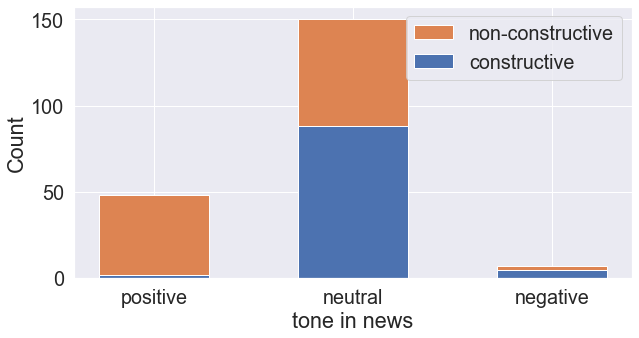

In [263]:
#Assigns the frequency values
nc = tone_cons.iloc[0][0:3].values
c = tone_cons.iloc[1][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['positive','neutral','negative']
p1 = plt.bar(categories, sin, 0.55)
p2 = plt.bar(categories, nonsin, 0.55, bottom=sin)
plt.legend((p2[0], p1[0]), ('non-constructive', 'constructive'))
plt.xlabel('tone in news')
plt.ylabel('Count')
plt.show()
#存在公关文等 

In [11]:
cons_single = pd.DataFrame(columns=cons)
for i in single:
    data = df[df[i]==1]
    tmp = []
    for j in cons:
        n = data[data[j]==1].shape[0] 
        tmp.append(n)


    cons_single = cons_single.reindex(index=list(cons_single.index)+[i])
    cons_single.loc[i] = tmp

In [12]:
cons_single

,建设性新闻-是否采取解决问题导向（如疫苗研制、政府援助、介绍社会各界的帮助和反应）,建设性新闻-是否强调公民赋权（如提供信息动员群众，为国家抗疫做贡献）,是否存在榜样/英雄叙事？（如疫情期间的小区送菜志愿者）,建设性新闻-是否出现未来导向（如，何时解除封城、未来疫情常态化）
叙事类型-个人叙事,36.0,2.0,22.0,3.0
叙事类型-非个人叙事,64.0,7.0,7.0,12.0


In [13]:
import matplotlib
matplotlib.matplotlib_fname() #将会获得matplotlib包所在文件夹
from matplotlib.font_manager import _rebuild

_rebuild()

/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_

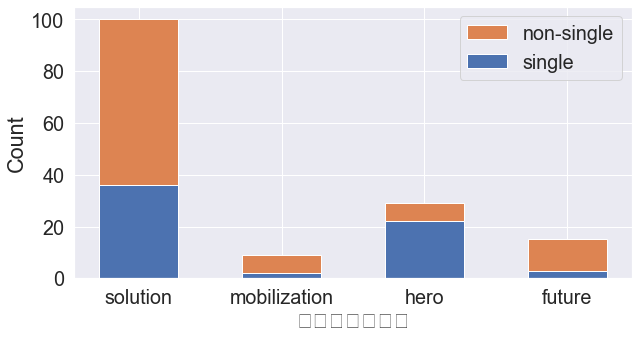

In [18]:
#Assigns the frequency values
sin = cons_single.iloc[0][0:4].values
nonsin = cons_single.iloc[1][0:4].values


#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ['solution','mobilization','hero','future']
p1 = plt.bar(categories, sin, 0.55)
p2 = plt.bar(categories, nonsin, 0.55, bottom=sin)
plt.legend((p2[0], p1[0]), ('non-single', 'single'))
plt.xlabel(u'建设性新闻特征')
plt.ylabel('Count')
plt.show()